In [1]:
library(miloR)
library(igraph)
library(BiocParallel)
library(SingleCellExperiment)
library(Matrix)
library(dplyr)
setwd('/lustre/scratch117/cellgen/team297/kt16/COVID_imperial_renal')

Loading required package: edgeR

Loading required package: limma


Attaching package: ‘igraph’


The following object is masked from ‘package:miloR’:

    graph


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    c

In [2]:
load('h5ad/df.fil3_gex_bcells_no_CLL_vdj_trimmed_wave1_milo_prep_230622.RData')
adata_no_knnx

class: SingleCellExperiment 
dim: 33559 29985 
metadata(10): WHO_temp_severity_colors case_control_colors ...
  initial_cluster_B_colors seurat_clusters_colors
assays(2): X counts
rownames(33559): MIR1302-2HG FAM138A ... VIRAL-Cytomegalovieus-(CMV)
  VIRAL-SARS-CoV2
rowData names(5): vst.mean vst.variance vst.variance.expected
  vst.variance.standardized vst.variable
colnames(29985): UK-CIC10689738+UK-CIC10690026_AACACGTGTTGGTGGA-1
  UK-CIC10689738+UK-CIC10690026_AACCATGCAGTCACTA-1 ...
  UK-CIC10689787+UK-CIC10690075_TTCCCAGCATCGGTTA-1
  UK-CIC10689787+UK-CIC10690075_TTGGAACGTTATGCGT-1
colData names(70): orig.ident nCount_RNA ... time_from_positive_swab
  time_from_infection
reducedDimNames(6): X_harmony_rna X_pca_rna ... X_umapafterharmony_rna
  X_umapbeforeharmony_rna
altExpNames(0):

In [3]:
mylo <- Milo(adata_no_knnx)
milo_graph <- buildFromAdjacency(knn_adjacencyx, k=50, is.binary=TRUE)
miloR::graph(mylo) <- miloR::graph(milo_graph)

In [4]:
dim(reducedDims(mylo)[['X_scVI']])

[1] 29985    10

In [5]:
mylo <- buildGraph(mylo, k=50, d=10, reduced.dim="X_scVI",  BPPARAM = MulticoreParam(workers = 24, progressbar = TRUE))
mylo <- makeNhoods(mylo, prop = 0.3, k=50, d=10, reduced_dim="X_scVI")

  |======================================================================| 100%



Constructing kNN graph with k:50

Checking valid object



In [6]:
mylo <- countCells_(mylo, meta.data = data.frame(colData(mylo)), samples="sample_id")
mylo <- calcNhoodDistance(mylo, d=10, reduced.dim = 'X_scVI', use.assay = 'counts')
mylo <- buildNhoodGraph(mylo)
saveRDS(mylo, 'h5ad/df.fil3_gex_bcells_no_CLL_vdj_trimmed_wave1_milo_230622.RDS')

Checking meta.data validity

Counting cells in neighbourhoods



In [7]:
# kernel died...
library(miloR)
library(igraph)
library(BiocParallel)
library(SingleCellExperiment)
library(Matrix)
library(dplyr)
setwd('/lustre/scratch117/cellgen/team297/kt16/COVID_imperial_renal')

In [8]:
mylo <- readRDS('h5ad/df.fil3_gex_bcells_no_CLL_vdj_trimmed_wave1_milo_230622.RDS')
metadata = data.frame(colData(mylo))

In [9]:
# metadata$case_control <- ordered(factor(metadata$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY')))
metadata$case_control <- factor(metadata$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
metadata$WHO_temp_severity <- factor(metadata$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
metadata$WHO_temp_severity_group <- factor(metadata$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
metadata$WHO_severity_group <- factor(metadata$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
metadata$grouped_temp_severity <- ifelse(metadata$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
metadata$grouped_severity <- ifelse(metadata$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
metadata$age_scaled <- scale(metadata$calc_age) # scale age
metadata$corrected_ethnicity = factor(metadata$corrected_ethnicity)
metadata$sex = factor(metadata$sex)
metadata$centre = factor(metadata$centre)

In [10]:
colnames(metadata)

[1] "orig.ident"                      "nCount_RNA"                     
 [3] "nFeature_RNA"                    "nCount_ADT"                     
 [5] "nFeature_ADT"                    "nCount_ADT_raw"                 
 [7] "nFeature_ADT_raw"                "nCount_RNA_raw"                 
 [9] "nFeature_RNA_raw"                "soupxOnAdt"                     
[11] "soupxOnRna"                      "percentMito"                    
[13] "exclude"                         "centre"                         
[15] "pool"                            "tcrId"                          
[17] "bcrId"                           "celltypist_broad_predLabel"     
[19] "celltypist_broad_maxPredProb"    "haniffa_broad_predLabel"        
[21] "haniffa_broad_maxPredProb"       "yoshida_broad_predLabel"        
[23] "yoshida_broad_maxPredProb"       "celltypist_detailed_predLabel"  
[25] "celltypist_detailed_maxPredProb" "yoshida_detailed_predLabel"     
[27] "yoshida_detailed_maxPredProb"    "seurat_clusters"                
[29] "RNA_sequencing_saturation"       "pool_factor"                    
[31] "merged_souporcell_status"        "patient_id"                     
[33] "sample_id"                       "ethnicity"                      
[35] "sex"                             "calc_age"                       
[37] "ihd"                             "previous_vte"                   
[39] "copd"                            "diabetes"                       
[41] "smoking"                         "cause_eskd"                     
[43] "renal_status"                    "WHO_severity"                   
[45] "admission_date"                  "discharge_date"                 
[47] "fatal_disease"                   "case_control"                   
[49] "date_positive_swab"              "date_first_symptoms"            
[51] "radiology_evidence_covid"        "sample_date"                    
[53] "temp_WCC"                        "temp_neut"                      
[55] "temp_mono"                       "temp_lymph"                     
[57] "temp_CRP"                        "temp_ddimer"                    
[59] "temp_ferritin"                   "temp_trop"                      
[61] "WHO_temp_severity"               "individual_id"                  
[63] "celltype_B_corrected"            "celltype_B_corrected_IFN"       
[65] "corrected_ethnicity"             "PC1_nonafricanVsAfrican"        
[67] "PC2_asianVsEuropean"             "time_from_first_symptoms"       
[69] "time_from_positive_swab"         "time_from_infection"            
[71] "WHO_temp_severity_group"         "WHO_severity_group"             
[73] "grouped_temp_severity"           "grouped_severity"               
[75] "age_scaled"

In [11]:
# remove 
metadata <- distinct(metadata[, c('sample_id', 'individual_id', 'case_control', 'WHO_temp_severity', 'WHO_temp_severity_group', 'WHO_severity_group', 'grouped_temp_severity', 'grouped_severity', 'sex', 'corrected_ethnicity', 'age_scaled', 'centre', 'PC1_nonafricanVsAfrican', 'PC2_asianVsEuropean')], .keep_all = TRUE)
metadata

,sample_id,individual_id,case_control,WHO_temp_severity,WHO_temp_severity_group,WHO_severity_group,grouped_temp_severity,grouped_severity,sex,corrected_ethnicity,age_scaled,centre,PC1_nonafricanVsAfrican,PC2_asianVsEuropean
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<fct>,<fct>,"<dbl[,1]>",<fct>,<dbl>,<dbl>
UK-CIC10689738+UK-CIC10690026_AACACGTGTTGGTGGA-1,C123_0505,C123,POSITIVE,moderate,mild_moderate,severe_critical,mild_moderate,severe_critical,M,Asian,-0.11984474,NCL,6.9610381,12.203095
UK-CIC10689738+UK-CIC10690026_AACCATGCAGTCACTA-1,C103_2204,C103,NEGATIVE,NA,NA,NA,severe_critical,severe_critical,M,European,-0.11984474,NCL,8.3666885,-5.166119
UK-CIC10689740+UK-CIC10690028_AAACCTGAGACCCACC-1,C214_2705,C214,NEGATIVE,NA,NA,NA,severe_critical,severe_critical,F,European,0.04425529,NCL,-4.2857051,-11.177220
UK-CIC10689740+UK-CIC10690028_AAACGGGAGCTCCTCT-1,C42_1504,C42,POSITIVE,moderate,mild_moderate,mild_moderate,mild_moderate,mild_moderate,M,European,-2.25314510,NCL,9.1024180,-7.881571
UK-CIC10689740+UK-CIC10690028_AAAGCAATCAACACAC-1,C40_0105,C40,POSITIVE,critical,severe_critical,severe_critical,severe_critical,severe_critical,M,African,-0.85829486,NCL,-81.6618850,-14.729245
UK-CIC10689742+UK-CIC10690030_AAACCTGGTCAAAGCG-1,C124_0105,C124,POSITIVE,mild,mild_moderate,mild_moderate,mild_moderate,mild_moderate,M,Asian,1.11090547,NCL,2.5594371,13.445346
UK-CIC10689742+UK-CIC10690030_AAAGTAGAGTGCTGCC-1,C104_2204,C104,NEGATIVE,NA,NA,NA,severe_critical,severe_critical,M,Asian,1.11090547,NCL,0.6681631,11.122892
UK-CIC10689742+UK-CIC10690030_AAAGTAGTCCCACTTG-1,C123_2404,C123,POSITIVE,severe,severe_critical,severe_critical,severe_critical,severe_critical,M,Asian,-0.11984474,NCL,6.9610381,12.203095
UK-CIC10689744+UK-CIC10690032_AAACCTGCAATGGACG-1,C106_2204,C106,NEGATIVE,NA,NA,NA,severe_critical,severe_critical,M,European,1.19295549,NCL,9.5336586,-17.519490


In [12]:
library(lmerTest)
library(BiocParallel)

Loading required package: lme4


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




In [13]:
options(warn = -1)
res <- as.list(1:nrow(nhoodCounts(mylo)))

In [14]:
res <- bplapply(res, function(x) glmer.nb(nhoodCounts(mylo)[x,] ~ case_control + sex + PC1_nonafricanVsAfrican + PC2_asianVsEuropean + age_scaled + (1|individual_id), offset = log(colSums(nhoodCounts(mylo))), data = metadata, control=glmerControl(check.conv.singular = .makeCC(action = "ignore",  tol = 1e-2), optimizer="bobyqa", tol=1e-02)), BPPARAM = MulticoreParam(workers = 23, progressbar = TRUE))

  |======================================================================| 100%



In [15]:
res_summary <- bplapply(res, summary, BPPARAM = MulticoreParam(workers = 23, progressbar = TRUE))

  |======================================================================| 100%



In [16]:
save(res_summary, res, metadata, file = 'h5ad/df.fil3_gex_bcells_no_CLL_vdj_trimmed_wave1_milo_results_230622.RData')

In [17]:
load(file = 'h5ad/df.fil3_gex_bcells_no_CLL_vdj_trimmed_wave1_milo_results_230622.RData')

In [18]:
# example coefficients for 1 neighborhood
res_summary[[1]]$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-8.905290561,0.342650847,-25.9894018,6.525512e-149
case_controlPOSITIVE,-0.468953597,0.309862764,-1.5134235,1.301721e-01
sexM,0.174148105,0.308103143,0.5652266,5.719196e-01
PC1_nonafricanVsAfrican,-0.003024992,0.006355759,-0.4759450,6.341136e-01
PC2_asianVsEuropean,0.005093333,0.010903713,0.4671191,6.404147e-01
age_scaled,0.068070495,0.177010291,0.3845567,7.005659e-01


In [19]:
singulars <- lapply(res, function(x) as.numeric(isSingular(x)))
conv <- lapply(res, function(x) length(slot(x, "optinfo")$conv$lme4$messages))

In [20]:
pvalue <- bplapply(res_summary, function(x) x$coefficients[2,4], BPPARAM=SerialParam(progress = TRUE))

  |======================================================================| 100%



In [21]:
beta <- bplapply(res_summary, function(x) x$coefficients[2,1], BPPARAM=SerialParam(progress = TRUE))

  |======================================================================| 100%



In [22]:
da.res = data.frame(Nhood = as.numeric(1:nrow(nhoodCounts(mylo))), beta = do.call(c, beta), PValue = do.call(c, pvalue))

In [23]:
da.res$Singular <- singulars
da.res$Conv <- conv

In [24]:
da.res$SpatialFDR <- graphSpatialFDR(x.nhoods=nhoods(mylo), graph=miloR::graph(mylo),
    weighting='k-distance', pvalues=da.res$PValue,
    indices=nhoodIndex(mylo), distances=nhoodDistances(mylo),
    reduced.dimensions=reducedDim(mylo, 'X_scVI'), k = 50)
da.res$Diff <- sign(da.res$beta)
da.res$Diff[da.res$SpatialFDR >= 0.1 | da.res$Conv > 0] <- 0
saveRDS(da.res, file = 'h5ad/df.fil3_gex_bcells_no_CLL_vdj_trimmed_wave1_milo_results_DA_230622.RDS')

In [25]:
table(da.res$Diff)


  -1    0    1 
 900 5656  557 

In [26]:
library(ggbeeswarm)
library(ggplot2)
new_DA_beeswarm <- function (da.res1, da.res2 = NULL, max = 5, color.by = 'SpatialFDR', group.by = NULL, split.by =NULL, alpha = 0.1, subset.nhoods = NULL, size = 2, filter = c('Mixed', 'doublets')) {
    if (!is.null(da.res2) && !is.null(split.by)){
        da.res1$split = split.by[1]
        da.res2$split = split.by[2]
        da.res <- rbind(da.res1, da.res2)
    } else {
        da.res <- da.res1
    }

    da.res$beta[da.res$beta > max] <- max
    da.res$beta[da.res$beta < -max] <- -max
    da.res <- da.res %>% filter(!get(group.by) %in% filter)
    if (!is.null(group.by)) {
        if (!group.by %in% colnames(da.res)) {
            stop(paste0(group.by, " is not a column in da.res. Have you forgot to run annotateNhoods(x, da.res, ", 
                group.by, ")?"))
        }
        if (is.numeric(da.res[, group.by])) {
            stop(paste0(group.by, " is a numeric variable. Please bin to use for grouping."))
        }
        da.res <- mutate(da.res, group_by = da.res[, group.by])
    }else {
        da.res <- mutate(da.res, group_by = "g1")
    }    
    if (!is.factor(da.res[, "group_by"])) {
        message(paste0("Converting group.by to factor..."))
        da.res <- mutate(da.res, factor(group_by, levels = unique(group_by)))
    }
    if (!is.null(subset.nhoods)) {
        da.res <- da.res[subset.nhoods, ]
    }
    
    da.res <- da.res %>% mutate(is_signif = ifelse((get(color.by) < alpha & get('Singular') < 1 & get('Conv') < 1), 
        1, 0)) %>% mutate(beta_color = ifelse(is_signif == 1, 
        beta, NA)) %>% arrange(group_by) %>% mutate(Nhood = factor(Nhood, 
        levels = unique(Nhood)))
    if (!is.null(split.by)){
        p <- ggplot(da.res, aes(group_by, beta, color = beta_color)) + 
            scale_color_gradient2(midpoint = 0, low = "#0571b0", mid = '#f7f7f7', high = "#ca0020", limits=c(-max/3, max/3), oob=scales::squish) +
            guides(color = "none") + 
            xlab(group.by) + 
            ylab("beta") + 
            geom_quasirandom(alpha = 1, size = size) +
            coord_flip() + 
            theme_bw() + 
            theme(axis.title.y = element_blank(),
                  axis.title.x = element_text(size=20, color = '#000000'),
                  axis.text = element_text(size=20, color = '#000000'),
                  axis.ticks = element_line(color = '#000000'),
                  panel.border = element_rect(colour = "#000000")
                ) + 
            facet_wrap(split~.) +
            theme(strip.background = element_blank(), strip.text.x = element_text(angle = 0, size = 20, color = '#000000'))
    } else {
        p <- ggplot(da.res, aes(group_by, beta, color = beta_color)) + 
        scale_color_gradient2(midpoint = 0, low = "#0571b0", mid = '#f7f7f7', high = "#ca0020", limits=c(-max/3, max/3), oob=scales::squish) +
        guides(color = "none") + 
        xlab(group.by) + 
        ylab("beta") + 
        geom_quasirandom(alpha = 1, size = size) +
        coord_flip() + 
        theme_bw() + 
        theme(axis.title.y = element_blank(),
              axis.title.x = element_text(size=20, color = '#000000'),
              axis.text = element_text(size=20, color = '#000000'),
              axis.ticks = element_line(color = '#000000'),
              panel.border = element_rect(colour = "#000000")
            ) + 
        theme(strip.background = element_blank(), strip.text.x = element_text(angle = 0, size = 20, color = '#000000'))
    }
    
    p$data <- p$data[order(p$data$beta_color, na.last = FALSE), ]
    return(p)
}

Loading required package: ggplot2



Converting group.by to factor...



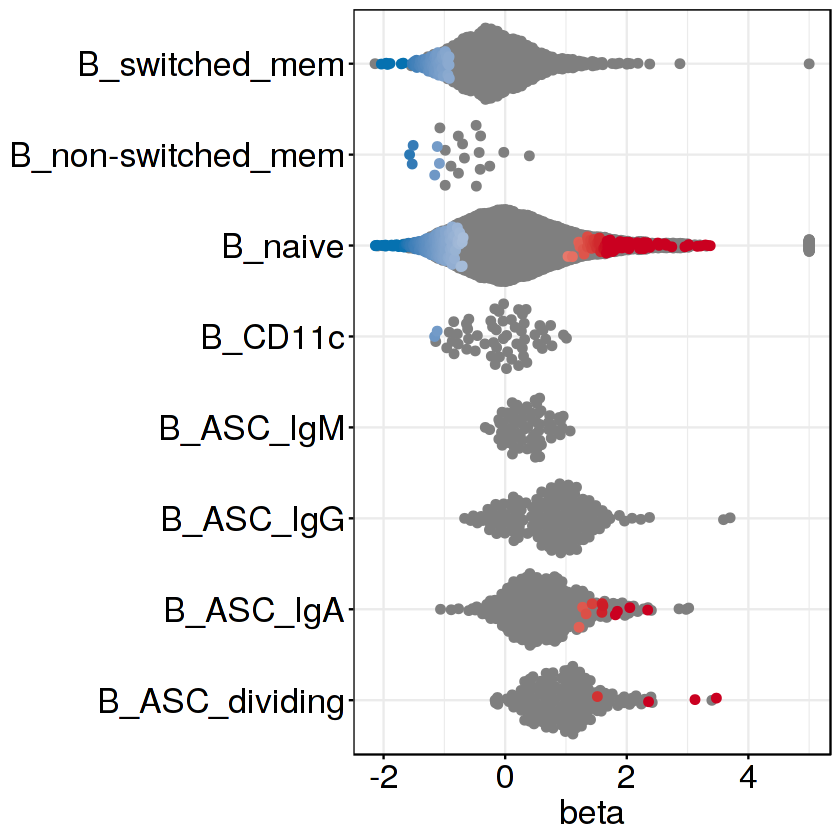

In [27]:
# options(repr.plot.width=20, repr.plot.height=10)
da.res <- annotateNhoods(mylo, da.res, coldata_col = "celltype_B_corrected")
da.res$celltype_B_corrected <- ifelse(da.res$celltype_B_corrected_fraction < 0.7, "Mixed", da.res$celltype_B_corrected)
p <- new_DA_beeswarm(da.res, color.by = 'SpatialFDR', group.by = "celltype_B_corrected", size = 2, alpha = .05)
p

Converting group.by to factor...



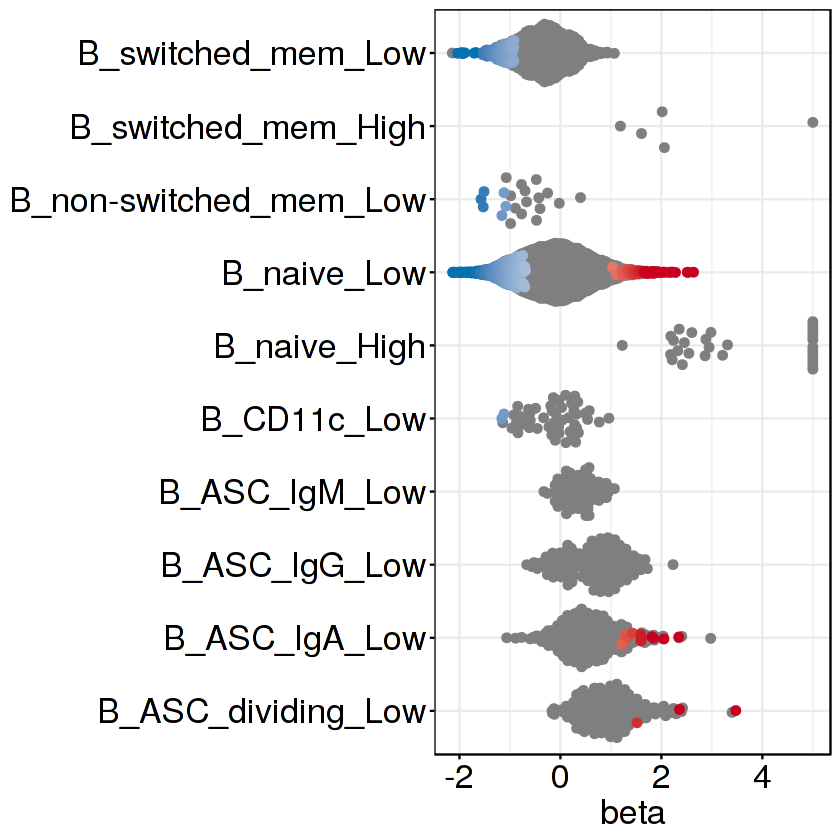

In [28]:
# options(repr.plot.width=20, repr.plot.height=10)
da.res <- annotateNhoods(mylo, da.res, coldata_col = "celltype_B_corrected_IFN")
da.res$celltype_B_corrected_IFN <- ifelse(da.res$celltype_B_corrected_IFN_fraction < 0.7, "Mixed", da.res$celltype_B_corrected_IFN)
p <- new_DA_beeswarm(da.res, color.by = 'SpatialFDR', group.by = "celltype_B_corrected_IFN", size = 2, alpha = .05)
p